In [13]:
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne import io, compute_raw_covariance, read_events, pick_types, Epochs
from mne.datasets import sample
from mne.preprocessing import Xdawn
from mne.viz import plot_epochs_image

Extracting parameters from ../Dataset/training data/AA56D/data/20230427_AA56D_orthosisErrorIjcai_multi_set1.vhdr...
Setting channel info structure...
Reading 0 ... 161269  =      0.000 ...   322.538 secs...
[]
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S 32', 'Stimulus/S 48', 'Stimulus/S 64', 'Stimulus/S 80', 'Stimulus/S 96']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 s)



/tmp/ipykernel_3471/1522436304.py:2: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (131.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file_path, preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
69 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 1051 original time points ...
1 bad epochs dropped


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


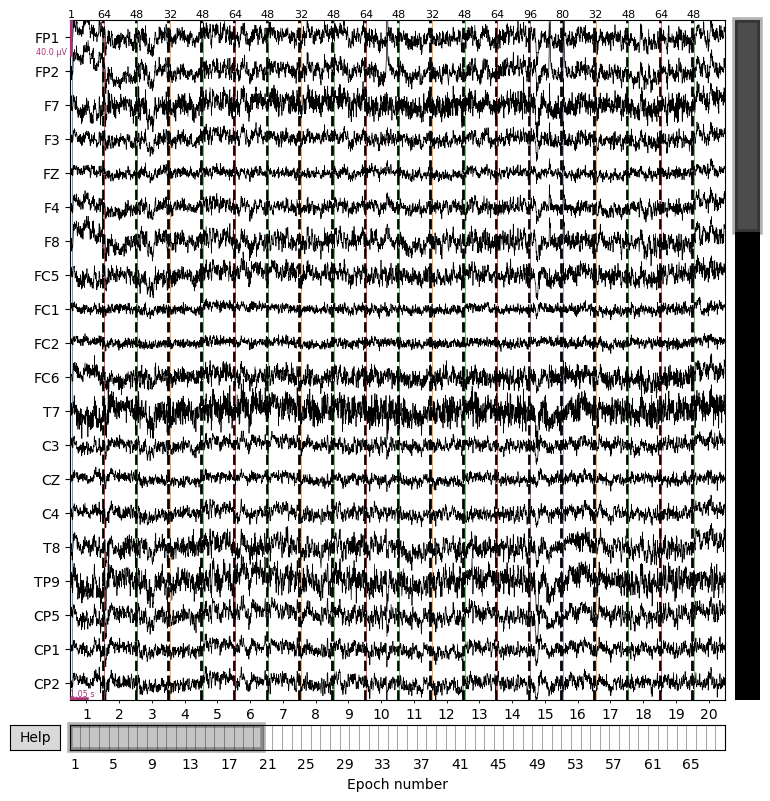

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


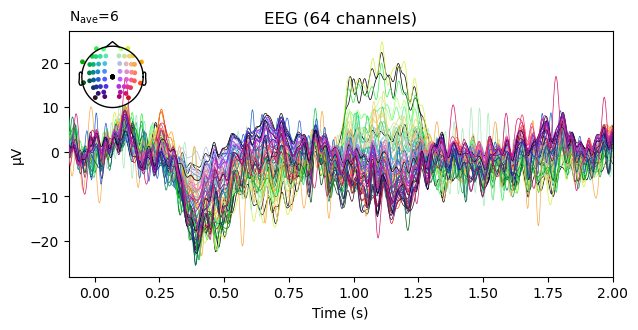

In [62]:
file_path = '../Dataset/training data/AA56D/data/20230427_AA56D_orthosisErrorIjcai_multi_set1.vhdr'
raw = mne.io.read_raw_brainvision(file_path, preload=True)

print(raw.info["bads"])
# Plot EEG
events = mne.events_from_annotations(raw)[0]
raw.filter(1, 30, fir_design="firwin")
raw.set_montage('standard_1020',on_missing='ignore')
epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=2, preload=True)
fig = epochs.plot(events=events)
l_aud = epochs["96"].average()
fig1 = l_aud.plot(spatial_colors=True)

# Get the data
data = raw.get_data()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 s)



/tmp/ipykernel_3471/3367374552.py:3: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (131.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file_path, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S 32', 'Stimulus/S 48', 'Stimulus/S 64', 'Stimulus/S 80', 'Stimulus/S 96']
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished
/tmp/ipykernel_3471/3367374552.py:16: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  plot_epochs_image(epochs["P300"], picks=[32], vmin=-30, vmax=30)


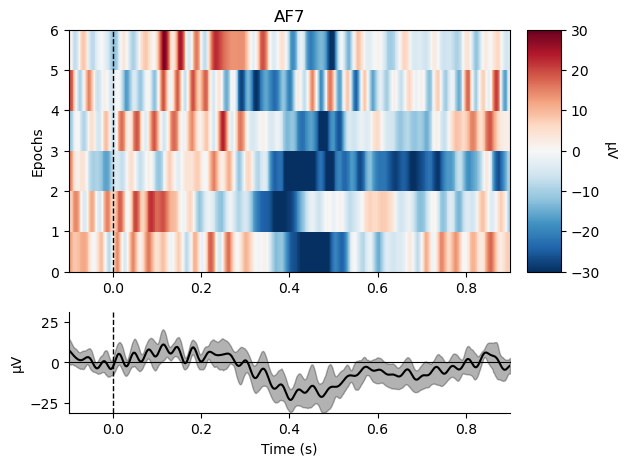

[<Figure size 640x480 with 3 Axes>]

In [59]:
mapping = {1: 1, 2: 1, 32: 1, 64: 1, 48: 1, 80: 1, 96: 2}
event_id={'P300': 2, 'non-P300': 1}
raw = mne.io.read_raw_brainvision(file_path, preload=True, verbose=False)
picks = mne.pick_types(raw.info, meg=False,
                           eeg=True, stim=False, eog=False)
raw.filter(1, 30, fir_design="firwin")

# Extract events and remap the event ids
events = mne.events_from_annotations(raw)[0]
events[:, 2] = np.vectorize(lambda x: mapping.get(x, -1))(events[:, 2])

epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.1, tmax=0.9,
                        proj=False, picks=picks, baseline=None, preload=True, verbose=False)

# Plot image epoch before xdawn
plot_epochs_image(epochs["P300"], picks=[32], vmin=-30, vmax=30)

In [60]:
# Estimates signal covariance
signal_cov = compute_raw_covariance(raw, picks=picks)

# Xdawn instance
xd = Xdawn(n_components=10, signal_cov=signal_cov)

# Fit xdawn
xd.fit(epochs)

Using up to 1612 segments
Number of samples used : 161200
[done]
Computing rank from data with rank='full'
    EEG: rank 64 from info
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 64 from info
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.


Xdawn({'correct_overlap': 'auto',
 'n_components': 10,
 'reg': None,
 'signal_cov': {'bads': [],
                'data': array([[ 1.15384607e-09,  6.89374673e-10,  2.55821420e-10, ...,
        -1.67386852e-10, -1.70833665e-10, -1.81267333e-10],
       [ 6.89374673e-10,  1.19827000e-09,  1.88776275e-10, ...,
        -1.53519767e-10, -1.61513914e-10, -1.73317545e-10],
       [ 2.55821420e-10,  1.88776275e-10,  2.38551864e-10, ...,
        -3.51827383e-11, -3.99317985e-11, -4.43892658e-11],
       ...,
       [-1.67386852e-10, -1.53519767e-10, -3.51827383e-11, ...,
         1.40337582e-10,  1.36527773e-10,  1.39488230e-10],
       [-1.70833665e-10, -1.61513914e-10, -3.99317985e-11, ...,
         1.36527773e-10,  1.39710890e-10,  1.42823336e-10],
       [-1.81267333e-10, -1.73317545e-10, -4.43892658e-11, ...,
         1.39488230e-10,  1.42823336e-10,  2.33032967e-10]]),
                'diag': False,
                'dim': 64,
                'eig': None,
                'eigvec': None,
  

Transforming to Xdawn space
Zeroing out 54 Xdawn components
Inverse transforming to sensor space
Transforming to Xdawn space
Zeroing out 54 Xdawn components
Inverse transforming to sensor space
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_3471/4172079328.py:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  plot_epochs_image(epochs["P300"], picks=[32], vmin=-30, vmax=30)


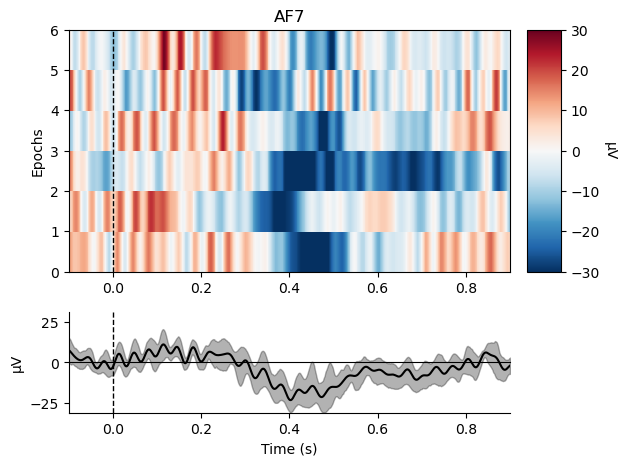

[<Figure size 640x480 with 3 Axes>]

In [61]:
epochs_denoised = xd.apply(epochs)

# Plot image epoch after Xdawn
plot_epochs_image(epochs["P300"], picks=[32], vmin=-30, vmax=30)